In [1]:
import pandas as pd

#Прочитайте csv файл (используйте функцию read_csv)
data = pd.read_csv("bestsellers with categories.csv")
data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [2]:
#Выведите первый пять строчек (используется функцию head)
data.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
#Выведите размеры датасета (используйте атрибут shape)
# Ответ: О скольки книгах хранит данные датасет? 550
data.shape

(550, 7)

In [4]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [5]:
# Ответ: Есть ли в каких либо переменных пропуски: Нет
data.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [6]:
#Ответ: Какие есть уникальные жанры? 'Non Fiction', 'Fiction'
data['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

<AxesSubplot:ylabel='Frequency'>

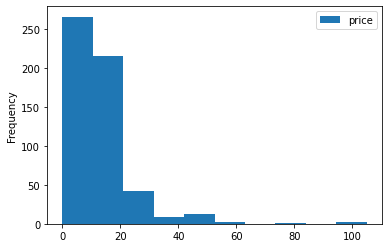

In [7]:
#Теперь посмотрите на распределение цен: постройте диаграмму (используйте kind='hist')
data.plot(y = 'price', kind = 'hist')

In [8]:
# Ответ: Mаксимальная цена: 105
data['price'].max()

105

In [9]:
# Ответ: Минимальная цена: 0
data['price'].min()

0

In [10]:
# Ответ: Средняя цена: 13.10
data['price'].mean()

13.1

In [11]:
# Ответ: Медианная цена: 11
data['price'].median()

11.0

In [15]:
#Ответ: Какой рейтинг в датасете наивысший? 4.9
max_rating = data['user_rating'].max()
max_rating

4.9

In [13]:
#Ответ: Сколько книг имеют такой рейтинг? 52
data[max_rating == data['user_rating']].shape[0]

52

In [16]:
#Ответ: У какой книги больше всего отзывов? Where the Crawdads Sing
data[data['reviews'] == data['reviews'].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [17]:
#Ответ: Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая
# (можно использовать промежуточный датафрейм)?  Publication Manual of the American Psychologic..
data_year = data[data['year'] == 2015]
data_year[data_year['price'].max() == data_year['price']]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


In [18]:
#Ответ: Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? 20
data[(data['year'] == 2010) & (data['genre'] == 'Fiction')].shape[0]

20

In [19]:
#Ответ: Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? 1
df = data[((data['year'] == 2010) | (data['year'] == 2011))]
len(df[df['user_rating'] == 4.9])

1

In [20]:
#Ответ: Какая книга последняя в отсортированном списке? Ответ: Old School (Diary of a Wimpy Kid #10)
data[(data['year'] == 2015) & (data['price'] < 8)].sort_values(by = 'price')

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [21]:
# Максимальная цена для жанра Fiction: 82
# Минимальная цена для жанра Fiction: 0
# Максимальная цена для жанра Non Fiction: 105
# Минимальная цена для жанра Non Fiction: 0
data.groupby(['genre']).agg({'price':['min', 'max']})

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

In [22]:
# Ответ: Какой размерности вышла таблица? Ответ: (248, 1)
df1 = data.groupby('author')['name'].agg(['count'])
df1.shape

(248, 1)

In [23]:
# Ответ: У какого автора больше всего книг? Ответ: Jeff Kinney
# Ответ: Сколько книг у этого автора? Ответ: 12
df1[df1['count'] == df1['count'].max()]

,count
author,
Jeff Kinney,12


In [24]:
#Ответ: У какого автора средний рейтинг минимальный? Donna Tartt
#Ответ: Какой у этого автора средний рейтинг? 3.9
df2 = data.groupby('author')['user_rating'].agg(['mean'])
df2[df2['mean'] == df2['mean'].min()]

,mean
author,
Donna Tartt,3.9


In [25]:
#Ответ: Какой автор первый в списке? Muriel Barbery
pd.concat([df1, df2], axis = 1).sort_values(by = ['count', 'mean'])

,count,mean
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364
